<a href="https://colab.research.google.com/github/ramiredddy/CROP-PRICE-PREDICTION/blob/main/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import csv

In [40]:
from google.colab import files
uploaded = files.upload()

Saving datasetup.csv to datasetup (1).csv


In [44]:
import io
crop = pd.read_csv(io.BytesIO(uploaded['datasetup (1).csv']))

In [45]:
crop.head()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature
0,69,321,33668,0.0030,0.0391,2763.2,1139,26.60
1,109,300,34352,0.0186,0.0378,3080.9,864,26.85
2,189,511,35796,0.0430,0.0430,2620.2,1080,27.00
3,59,90,41572,0.1608,0.0381,2355.9,945,27.30
4,53,73,47728,0.1482,0.0377,2460.1,1309,27.31


In [46]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    15104 non-null  int64  
 1   Production              15104 non-null  int64  
 2   GDP                     15104 non-null  int64  
 3   Annual Growth Rate (%)  15104 non-null  float64
 4   Inflation               15104 non-null  float64
 5   Rainfall                15104 non-null  float64
 6   Price                   15104 non-null  int64  
 7   Temparature             14396 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 944.1 KB


In [47]:
crop['Price'].value_counts()

,count
Price,
1009,1701
1284,939
1094,923
1309,895
1030,866
1494,866
1139,861
1575,856
1110,850


In [48]:
crop['Area'].value_counts()

,count
Area,
1000,136
9000,102
9,82
99000,66
1,62
...,...
453996,1
989645,1
99681,1


In [49]:
crop.describe()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature
count,1.510400e+04,1.510400e+04,15104.000000,15104.000000,15104.000000,15104.000000,15104.000000,14396.000000
mean,2.049292e+06,1.062945e+05,69566.345339,0.089930,0.072691,1615.374378,1166.028204,24.920767
std,7.868913e+07,1.738664e+05,32009.523253,0.087498,0.031301,938.528063,201.516341,3.124370
min,1.000000e+00,0.000000e+00,31388.000000,-0.029000,0.037700,0.000000,864.000000,12.210000
25%,8.934500e+03,4.964750e+03,35796.000000,0.004000,0.042500,926.500000,1009.000000,23.940000
50%,5.998300e+04,3.041250e+04,61332.000000,0.074100,0.066500,1291.900000,1110.000000,25.760000
75%,1.931450e+05,1.350475e+05,103208.000000,0.148200,0.093100,2372.200000,1309.000000,26.750000
max,9.459455e+09,1.710000e+06,122056.000000,0.274700,0.132300,4229.400000,1575.000000,32.900000


In [50]:
%matplotlib inline

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Production'}>,
        <Axes: title={'center': 'GDP'}>],
       [<Axes: title={'center': 'Annual Growth Rate (%)'}>,
        <Axes: title={'center': 'Inflation'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Temparature'}>, <Axes: >]], dtype=object)

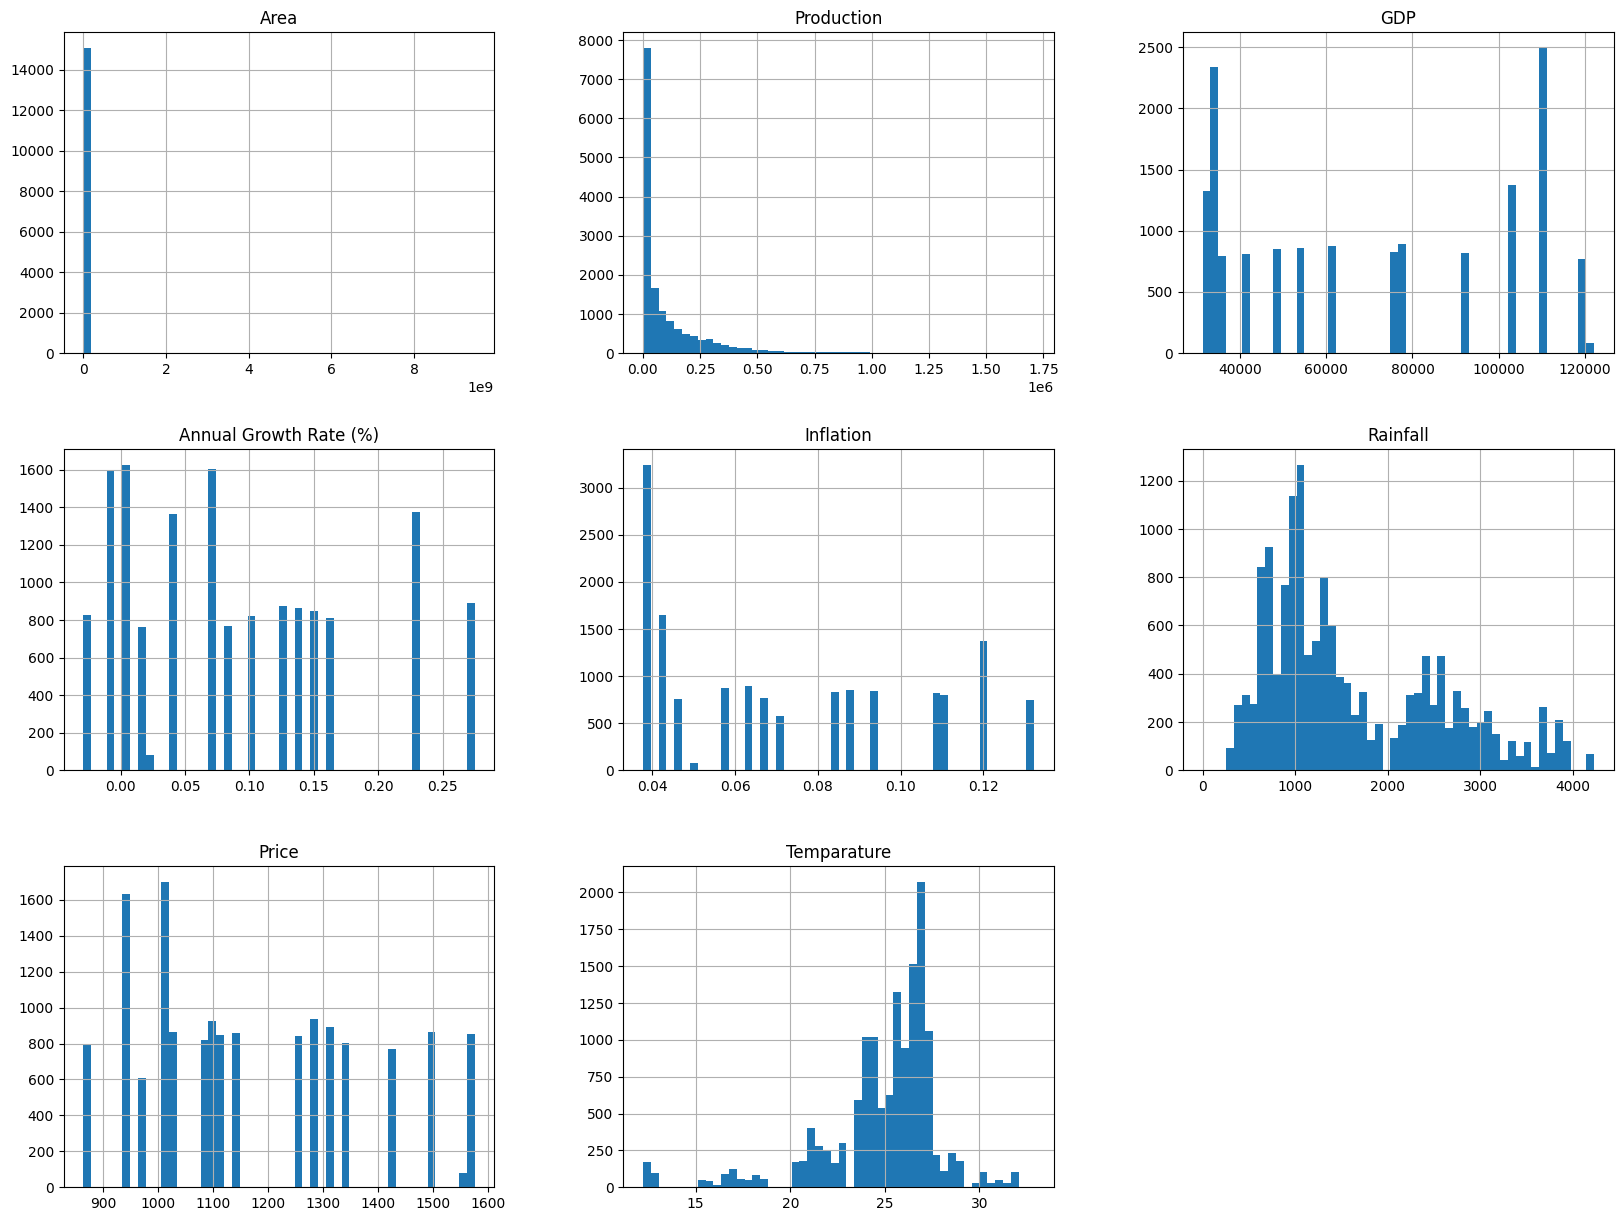

In [51]:

import matplotlib.pyplot as plt
crop.hist(bins=50, figsize=(20, 15))

In [52]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [53]:
train_set, test_set = split_train_test(crop, 0.2)

[ 8649  5563 10148 ...  5390   860  7270]


In [54]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 12084
Rows in test set: 3020



In [55]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(crop, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 12083
Rows in test set: 3021



In [56]:
crop.replace([np.inf, -np.inf], np.nan, inplace=True)

In [58]:
crop.fillna(999, inplace=True)

In [57]:

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(crop, crop['Price']):
    strat_train_set = crop.loc[train_index]
    strat_test_set = crop.loc[test_index]

In [59]:
strat_train_set['Temparature'].value_counts()

,count
Temparature,
25.31,243
26.71,175
26.75,152
26.70,147
25.90,145
...,...
26.30,1
25.91,1
26.25,1


In [60]:
crop=strat_train_set.copy()

In [61]:
corr_matrix = crop.corr()
corr_matrix['Price'].sort_values(ascending=False)

,Price
Price,1.000000
GDP,0.571759
Inflation,0.243414
Temparature,0.072415
Production,0.011629
Area,-0.000863
Rainfall,-0.022461
Annual Growth Rate (%),-0.062013


array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Inflation', ylabel='Price'>,
        <Axes: xlabel='Temparature', ylabel='Price'>,
        <Axes: xlabel='GDP', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='Inflation'>,
        <Axes: xlabel='Inflation', ylabel='Inflation'>,
        <Axes: xlabel='Temparature', ylabel='Inflation'>,
        <Axes: xlabel='GDP', ylabel='Inflation'>],
       [<Axes: xlabel='Price', ylabel='Temparature'>,
        <Axes: xlabel='Inflation', ylabel='Temparature'>,
        <Axes: xlabel='Temparature', ylabel='Temparature'>,
        <Axes: xlabel='GDP', ylabel='Temparature'>],
       [<Axes: xlabel='Price', ylabel='GDP'>,
        <Axes: xlabel='Inflation', ylabel='GDP'>,
        <Axes: xlabel='Temparature', ylabel='GDP'>,
        <Axes: xlabel='GDP', ylabel='GDP'>]], dtype=object)

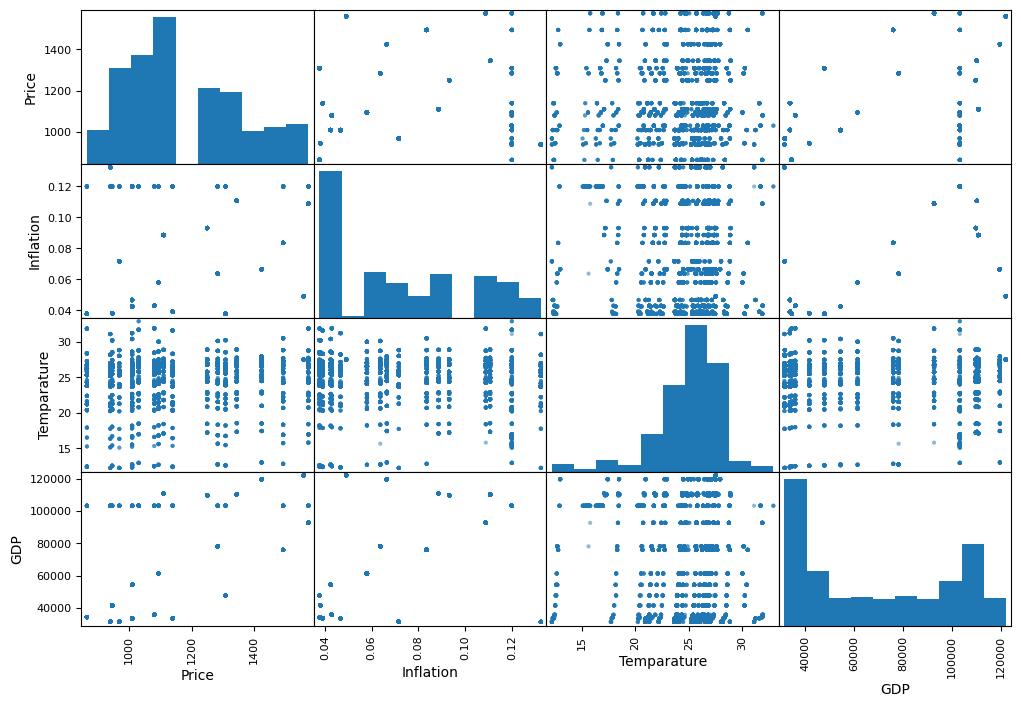

In [62]:
from pandas.plotting import scatter_matrix
attributes = ["Price", "Inflation", "Temparature", "GDP"]
scatter_matrix(crop[attributes], figsize = (12,8))

<Axes: xlabel='GDP', ylabel='Price'>

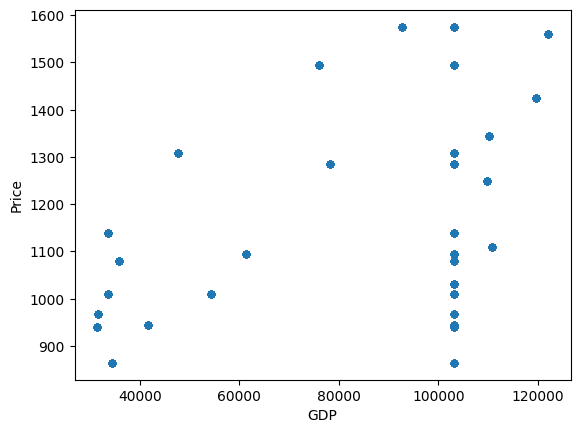

In [63]:
crop.plot(kind="scatter", x="GDP", y="Price", alpha=0.8)

<Axes: xlabel='Annual Growth Rate (%)', ylabel='Price'>

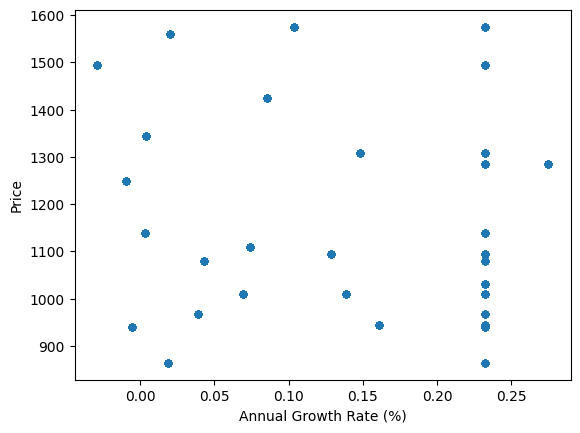

In [64]:
crop.plot(kind="scatter", x="Annual Growth Rate (%)", y="Price", alpha=0.8)

In [65]:
crop["prod"] = crop['Production']/crop['Area']

In [66]:
crop.head()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature,prod
5130,45159,3241,47728,0.1482,0.0377,1136.6,1309,NaN,0.071769
590,4506,574,110808,0.0741,0.0886,2193.7,1110,22.75,0.127386
5681,909458,47154,92645,0.1036,0.1088,3862.0,1575,24.25,0.051848
4022,31454589,411096,34352,0.0186,0.0378,1600.1,864,26.50,0.013070
315,4545900,133400,31388,-0.0053,0.1323,948.1,939,31.10,0.029345


In [67]:
crop = strat_train_set.drop("Price", axis=1)
crop_labels = strat_train_set["Price"].copy()

In [69]:
median = crop["Temparature"].median()

In [70]:
crop["Temparature"].fillna(median)

,Temparature
5130,25.76
590,22.75
5681,24.25
4022,26.50
315,31.10
...,...
10470,27.50
13057,26.65
9569,27.45
14031,20.60


In [71]:
crop.shape

(12083, 7)

In [72]:
crop.describe()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Temparature
count,1.208300e+04,1.208300e+04,12083.000000,12083.000000,12083.000000,12083.000000,11521.000000
mean,2.221917e+06,1.065098e+05,69530.411901,0.089924,0.072659,1614.869974,24.924921
std,8.773076e+07,1.735096e+05,32022.670371,0.087485,0.031285,938.245202,3.124873
min,1.000000e+00,0.000000e+00,31388.000000,-0.029000,0.037700,0.000000,12.210000
25%,8.959000e+03,5.000000e+03,35796.000000,0.004000,0.042500,926.500000,23.940000
50%,6.060900e+04,3.067000e+04,61332.000000,0.074100,0.066500,1291.900000,25.760000
75%,1.931260e+05,1.350530e+05,103208.000000,0.148200,0.093100,2372.200000,26.750000
max,9.459455e+09,1.710000e+06,122056.000000,0.274700,0.132300,4229.400000,32.900000


In [73]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(crop)

SimpleImputer(strategy='median')